In [ ]:
# -*- coding: utf-8 -*-
# encoding = uft-8
import pandas as pd
import numpy as np

In [ ]:
train_feature = pd.read_csv('../train/train_feature.csv')
train_label = pd.read_csv('../train/train_label.csv')
test_feature = pd.read_csv('../train/test_feature.csv')

In [ ]:
train_feature = train_feature.rename(columns = {'Unnamed: 0':'shop_id'})

In [ ]:
train_feature

In [ ]:
train_feature['week1_mean'] = train_feature.loc[:,'col_0':'col_6'].mean(axis=1)

In [ ]:
train_feature['week2_mean'] = train_feature.loc[:,'col_7':'col_13'].mean(axis=1)

In [ ]:
train_feature['week3_mean'] = train_feature.loc[:,'col_14':'col_20'].mean(axis=1)

In [ ]:
train_feature['shop_id'] = train_feature['shop_id']+1

In [ ]:
shop_info = pd.read_csv('../dataset/preprocessed/shop_info_0221.csv')

In [ ]:
shop_info_cat = shop_info.loc[:,'cate_1':'cate_3']
shop_info_cat['shop_id'] = shop_info['id']
shop_info_cat

In [ ]:
usr_day_pay = pd.read_csv('../dataset/preprocessed/shop_date_dapay.csv')

In [ ]:
usr_day_pay

In [ ]:
cat_statis = train_feature.merge(shop_info_cat,on='shop_id')
cat_statis

In [ ]:
cat_null = cat_statis['cate_3'].isnull().nonzero()
for index in cat_null:
    print cat_statis['cate_2'].iloc[index]
        

In [ ]:
for index in cat_null:
    cat_statis['cate_3'].iloc[index] = cat_statis['cate_2'].iloc[index].values

In [ ]:
cate3_list = cat_statis['cate_3'].value_counts()

In [ ]:
names = list(cat_statis.loc[:,'col_0':'col_20'].columns) + ['cate_3']

In [ ]:
train_three_week = cat_statis[names]

In [ ]:
cat_mean = train_three_week.groupby('cate_3').mean()
cat_mean

In [ ]:
cate3_list

In [ ]:
cat_mean_week1 = cat_mean.loc[:,'col_0':'col_6'].mean(axis=1).to_dict()
cat_mean_week2 = cat_mean.loc[:,'col_7':'col_13'].mean(axis=1).to_dict()
cat_mean_week3 = cat_mean.loc[:,'col_14':'col_20'].mean(axis=1).to_dict()

In [ ]:
cat_mean_week1

In [ ]:
train_feature['cate_3_week1_mean'] = 0
train_feature['cate_3_week2_mean'] = 0
train_feature['cate_3_week3_mean'] = 0
train_feature

In [ ]:
cat_mean_week1[cat_statis['cate_3'].iloc[1]]

In [ ]:
for index in range(2000):
    train_feature['cate_3_week1_mean'].iloc[index] = cat_mean_week1[cat_statis['cate_3'].iloc[index]]

In [ ]:
train_feature

In [ ]:
for index in range(2000):
    train_feature['cate_3_week2_mean'].iloc[index] = cat_mean_week2[cat_statis['cate_3'].iloc[index]]
for index in range(2000):
    train_feature['cate_3_week3_mean'].iloc[index] = cat_mean_week3[cat_statis['cate_3'].iloc[index]]   

In [ ]:
train_feature.to_csv('train_feature_0222.csv')

In [ ]:
test_feature = pd.read_csv('../train/test_feature.csv')
test_feature

In [ ]:
test_feature['week1_mean'] = test_feature.loc[:,'col_0':'col_6'].mean(axis=1)
test_feature['week2_mean'] = test_feature.loc[:,'col_7':'col_13'].mean(axis=1)
test_feature['week3_mean'] = test_feature.loc[:,'col_14':'col_20'].mean(axis=1)

In [ ]:
test_feature

In [ ]:
test_feature = test_feature.rename(columns = {'Unnamed: 0':'shop_id'})
test_feature

In [ ]:
test_feature['shop_id'] = test_feature['shop_id']+1
test_feature

In [ ]:
usr_day_pay = pd.read_csv('../dataset/preprocessed/shop_date_dapay.csv')
usr_day_pay

In [ ]:
cat_statis_test = test_feature.merge(shop_info_cat,on='shop_id')

In [ ]:
cat_statis_test

In [ ]:
cat_null_test = cat_statis_test['cate_3'].isnull().nonzero()
for index in cat_null:
    cat_statis_test['cate_3'].iloc[index] = cat_statis_test['cate_2'].iloc[index].values

In [ ]:
names_test = list(cat_statis_test.loc[:,'col_0':'col_20'].columns) + ['cate_3']
names_test

In [ ]:
test_three_week = cat_statis_test[names]

In [ ]:
cat_mean_test = test_three_week.groupby('cate_3').mean()
cat_mean_test

In [ ]:
cat_mean_week1_test = cat_mean_test.loc[:,'col_0':'col_6'].mean(axis=1).to_dict()
cat_mean_week2_test = cat_mean_test.loc[:,'col_7':'col_13'].mean(axis=1).to_dict()
cat_mean_week3_test = cat_mean_test.loc[:,'col_14':'col_20'].mean(axis=1).to_dict()

In [ ]:
test_feature['cate_3_week1_mean'] = 0
test_feature['cate_3_week2_mean'] = 0
test_feature['cate_3_week3_mean'] = 0
test_feature

In [ ]:
for index in range(2000):
    test_feature['cate_3_week1_mean'].iloc[index] = cat_mean_week1_test[cat_statis_test['cate_3'].iloc[index]]
    test_feature['cate_3_week2_mean'].iloc[index] = cat_mean_week2_test[cat_statis_test['cate_3'].iloc[index]]
    test_feature['cate_3_week3_mean'].iloc[index] = cat_mean_week3_test[cat_statis_test['cate_3'].iloc[index]]

In [ ]:
test_feature

In [ ]:
train_feature

In [ ]:
test_feature.to_csv('test_feature_0222.csv')

In [ ]:
prediction = pd.read_csv('../output/submit_170221.csv',names = ['id','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14'])
prediction

In [ ]:
train_feature = pd.read_csv('../train/train_feature.csv')
train_feature

In [ ]:
train_feature_2 = pd.read_csv('../train/test_feature.csv')
train_feature_2['Unnamed: 0']

In [ ]:
import sys
sys.path.append('./RandomForest/')


In [ ]:
train_label = pd.read_csv('../train/train_label.csv')
train_label

In [ ]:

para = {'n_estimators':[1200],'n_jobs':[-1],'random_state':[1],'min_samples_split':[2],\
                        'min_samples_leaf':[2],'max_depth':[25],'criterion':['mse'],'max_features':[237]}

In [ ]:
# -*- coding: utf-8 -*-
# encoding = uft-8
"""
@Author: Alfred Gao
"""
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer
import sys
sys.path.append('../')
import time
from __utils import cal_offline_score
from __utils import get_result


class myTreesRegressor():
    def __init__(self):
        self.n_estimators=0
        self.random_state=0
        self.n_jobs=0
        self.min_samples_split=0
        self.min_samples_leaf=0
        self.max_depth=0
        self.max_features=0

    def gridSearch(self, train, train_label, para, isPath=False):
        ExtraTree = ExtraTreesRegressor()
        parameters = para
        import os
        if isPath:
            if os.path.isfile(train) and os.path.isfile(train_label):
                train_feature = pd.read_csv(train)
                train_label = pd.read_csv(train_label)
                del train_feature['Unnamed: 0']
                del train_label['Unnamed: 0']
        else:
            train_feature = train
            train_label = train_label
            del train_feature['Unnamed: 0']
            del train_label['id']


        train_feature_val = train_feature.values
        train_label_val = train_label.values

        kf = KFold(len(train_feature_val),n_folds=5,shuffle=True,random_state=1)
        loss = make_scorer(cal_offline_score,greater_is_better=False)
        #Grid Search for the best parameters
        self.GridSearchModel = GridSearchCV(ExtraTree,param_grid=parameters,cv=kf,scoring=loss)
        self.GridSearchModel.fit(train_feature_val,train_label_val)
        return self.GridSearchModel.best_params_


    def predict(self, train_feature, train_label, predict, best_p, singleOutput = False, isPath=False):
        import os
        if isPath:
            if os.path.isfile(data):
                predict_feature = pd.read_csv(data)
        else:
            predict_feature = predict
# test_feature = pd.read_csv('../../train/test_feature_0222.csv')
#Del the 'Unnamed:0' col in three tables.

        ExtraTree = ExtraTreesRegressor(n_estimators=best_p['n_estimators'],
                                        random_state=best_p['random_state'],
                                        n_jobs=best_p['n_jobs'],
                                        min_samples_split=best_p['min_samples_split'],
                                        min_samples_leaf=best_p['min_samples_leaf'],
                                        max_depth=best_p['max_depth'],
                                        max_features=best_p['max_features'])
        
        ExtraTree.fit(train_feature, train_label)
        result = (ExtraTree.predict(test_feature)).round()
        if not singleOutput:
            result = get_result(result)
            timestamp = time.strftime("%y%m%d")
            save_submit_path = '../../output/submit_' + timestamp + '.csv'
            result.to_csv(save_submit_path,index=False,header=False)
        result = result.astype(int)
        return result

# pre = pd.read_csv('../../output/submit_170221.csv',names=['id','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14'])
# true = pd.read_csv('../../output/submit_170222.csv',names=['id','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14'])
# true['d11'] = (true['d11']*1.2).round()
# true = true.astype(int)
# true.to_csv('submit_170222_double11.csv',index=False, header=False)
# del pre['id']
# del true['id']
#
# print cal_offline_score(np.array(pre), np.array(true))


In [ ]:
train_feature_2

In [ ]:
myET = myExtraTreesRegressor()
best_p = myET.gridSearch(train_feature_2, prediction[['id','d1','d2','d3','d4','d5','d6','d7']],para)

In [ ]:
best_p


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from __utils import *
shop_date_pay = pd.read_csv('../dataset/preprocessed/shop_date_dapay.csv')
shop_info = pd.read_csv('../dataset/preprocessed/shop_info_0221.csv')
week_3 = select_days_range('2016-10-18','2016-10-24',shop_date_pay)
week_4 = select_days_range('2016-10-25','2016-10-31',shop_date_pay)

In [ ]:
week_3

In [ ]:
week_4

In [ ]:
week_predict = prediction[['d1','d2','d3','d4','d5','d6','d7']]

In [ ]:
test_feature_raw = week_3.join(week_4.join(week_predict))
test_feature_raw

In [ ]:
test_null_value = find_null(train_feature_raw)

In [ ]:
test_feature = smooth_null(train_null_value, train_feature_raw)

In [ ]:
test_null_value = find_null(train_feature_raw)
test_null_value

In [ ]:
test_sum = test_feature.sum(axis=1)
test_sum

In [ ]:
test_mean = test_feature.mean(axis=1)
test_std = test_feature.std(axis=1)
test_max = test_feature.max(axis=1)
test_min = test_feature.min(axis=1)
test_median = test_feature.median(axis=1)
test_mad = test_feature.mad(axis=1)
test_var = test_feature.var(axis=1)
week_end = ['2016-10-22','2016-10-23','2016-10-29','2016-10-30','d5','d6']
test_weekend_ration = test_feature[week_end].sum(axis=1)/test_sum
test_day_pay = shop_info['per_pay']
test_city_level = shop_info['city_level']
poly = PolynomialFeatures(2, interaction_only = True, include_bias=False)

In [ ]:
test_feature = transfer_2dataframe(poly.fit_transform(test_feature))
test_feature['sum'] = test_sum
test_feature['mean'] = test_mean
test_feature['var'] = test_var
test_feature['weekend'] = test_weekend_ration
test_feature['day_pay'] = test_day_pay
test_feature['city_level'] = test_city_level

In [ ]:
test_feature

In [ ]:
myTree = myTreesRegressor()
predict_1 = prediction.loc[:,'d1':'d7']
best_p

In [ ]:
predict_2 = myTree.predict(train_feature_2, predict_1, test_feature, best_p, singleOutput = True, isPath=False)

In [ ]:
predict_2 = pd.DataFrame(predict_2)
predict_1

In [ ]:
predict_final = predict_2.join(predict_1)
np.array(predict_final).shape
index = [x+1 for x in range(2000)]
index
predict_final.insert(0,'id',index)
predict_final.to_csv('../output/submit_170223.csv',index=False,header=False)
index

In [ ]:
submit = pd.read_csv('../output/submit_170221.csv',names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
np.array(submit).shape
submit

In [ ]:
cal_offline_score(np.array(predict_final),np.array(submit))

#23/22/17 Full data in 国庆

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from __utils import *


shop_date_pay = pd.read_csv('../dataset/preprocessed/shop_date_dapay.csv')
shop_info = pd.read_csv('../dataset/preprocessed/shop_info_0221.csv')
week_1 = select_days_range('2016-09-20','2016-09-26',shop_date_pay)
week_2 = select_days_range('2016-09-27','2016-10-03',shop_date_pay)
week_3 = select_days_range('2016-10-04','2016-10-10',shop_date_pay)
week_4 = select_days_range('2016-10-11','2016-10-17',shop_date_pay)
week_5 = select_days_range('2016-10-18','2016-10-24',shop_date_pay)
week_6 = select_days_range('2016-10-25','2016-10-31',shop_date_pay)

In [ ]:
train_feature_raw = week_1.join(week_2.join(week_3.join(week_4.join(week_5))))

In [ ]:
train_feature_raw

In [ ]:
train_null_value = find_null(train_feature_raw)

In [ ]:
train_feature = smooth_null(train_null_value, train_feature_raw)

In [ ]:
train_null_value = find_null(train_feature_raw)
train_null_value
train_feature.iloc[809] = [7,5,4,6,9,6,11,7,5,4,6,9,6,11,7,5,4,6,9,6,11,7,5,4,6,9,6,11,7,5,4,6,9,6,11]

In [ ]:
train_mean = train_feature.mean(axis=1)
train_std = train_feature.std(axis=1)
train_max = train_feature.max(axis=1)
train_min = train_feature.min(axis=1)
train_median = train_feature.median(axis=1)
train_mad = train_feature.mad(axis=1)
train_var = train_feature.var(axis=1)

In [ ]:
week_end = ['2016-09-24','2016-09-25','2016-10-01','2016-10-02','2016-10-08','2016-10-09','2016-10-15','2016-10-16','2016-10-22','2016-10-23']

In [ ]:
train_sum = train_feature.sum(axis=1)
train_weekend_ration = train_feature[week_end].sum(axis=1)/train_sum

In [ ]:
train_day_pay = shop_info['per_pay']
train_city_level = shop_info['city_level']
poly = PolynomialFeatures(2, interaction_only = True, include_bias=False)

In [ ]:
train_feature = transfer_2dataframe(poly.fit_transform(train_feature))
# train_feature['sum'] = train_sum
train_feature['mean'] = train_mean
train_feature['var'] = train_var
train_feature['weekend'] = train_weekend_ration
train_feature['day_pay'] = train_day_pay
train_feature['city_level'] = train_city_level

In [ ]:
train_feature.to_csv('../train/train_feature_fullGQ.csv')

In [ ]:
train_feature

In [ ]:
test_feature_raw = week_2.join(week_3.join(week_4.join(week_5.join(week_6))))
test_feature_raw

In [ ]:
test_null_value = find_null(test_feature_raw)
test_feature = smooth_null(test_null_value, test_feature_raw)

In [ ]:
test_sum = test_feature.sum(axis=1)
print test_sum
test_mean = test_feature.mean(axis=1)
test_std = test_feature.std(axis=1)
test_max = test_feature.max(axis=1)
test_min = test_feature.min(axis=1)
test_median = test_feature.median(axis=1)
test_mad = test_feature.mad(axis=1)
test_var = test_feature.var(axis=1)
week_end = ['2016-10-01','2016-10-02','2016-10-08','2016-10-09','2016-10-15','2016-10-16','2016-10-22','2016-10-23','2016-10-29','2016-10-30']

In [ ]:
test_weekend_ration = test_feature[week_end].sum(axis=1)/test_sum
test_day_pay = shop_info['per_pay']
test_city_level = shop_info['city_level']
poly = PolynomialFeatures(2, interaction_only = True, include_bias=False)

In [ ]:
test_feature = transfer_2dataframe(poly.fit_transform(test_feature))
# test_feature['sum'] = test_sum
test_feature['mean'] = test_mean
test_feature['var'] = test_var
test_feature['weekend'] = test_weekend_ration
test_feature['day_pay'] = test_day_pay
test_feature['city_level'] = test_city_level
test_feature

In [ ]:
test_feature.to_csv('../train/test_feature_fullGQ.csv')

In [ ]:
pd.isnull(test_feature).any(1).nonzero()

In [ ]:
train_label = pd.read_csv('../train/train_label.csv')
del train_label['Unnamed: 0']
train_label

In [ ]:
# -*- coding: utf-8 -*-
# encoding = uft-8
"""
@Author: Alfred Gao
"""
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer
import sys
sys.path.append('../')
import time
from __utils import cal_offline_score
from __utils import get_result


class mytreeRegressor():
    def __init__(self):
        self.n_estimators=0
        self.random_state=0
        self.n_jobs=0
        self.min_samples_split=0
        self.min_samples_leaf=0
        self.max_depth=0
        self.max_features=0

    def gridSearch(self, train, train_label, para, isPath=False):
        ExtraTree = ExtraTreesRegressor()
        parameters = para
        import os
        if isPath:
            if os.path.isfile(train) and os.path.isfile(train_label):
                train_feature = pd.read_csv(train)
                train_label = pd.read_csv(train_label)
                del train_feature['Unnamed: 0']
                del train_label['Unnamed: 0']
        else:
            train_feature = train
            train_label = train_label
            try:
                del train_feature['Unnamed: 0']
                del train_label['id']
            except:
                print 'SB'

        train_feature_val = train_feature.values
        train_label_val = train_label.values

        kf = KFold(len(train_feature_val),n_folds=5,shuffle=True,random_state=1)
        loss = make_scorer(cal_offline_score,greater_is_better=False)
        #Grid Search for the best parameters
        self.GridSearchModel = GridSearchCV(ExtraTree,param_grid=parameters,cv=kf,scoring=loss)
        self.GridSearchModel.fit(train_feature_val,train_label_val)
        return self.GridSearchModel.best_params_


    def predict(self, train_feature, train_label, predict, best_p, singleOutput = False, isPath=False):
        import os
        if isPath:
            if os.path.isfile(data):
                predict_feature = pd.read_csv(data)
        else:
            predict_feature = predict
# test_feature = pd.read_csv('../../train/test_feature_0222.csv')
#Del the 'Unnamed:0' col in three tables.

        ExtraTree = ExtraTreesRegressor(n_estimators=best_p['n_estimators'],
                                        random_state=best_p['random_state'],
                                        n_jobs=best_p['n_jobs'],
                                        min_samples_split=best_p['min_samples_split'],
                                        min_samples_leaf=best_p['min_samples_leaf'],
                                        max_depth=best_p['max_depth'],
                                        max_features=best_p['max_features'])

        ExtraTree.fit(train_feature, train_label)
        result = (ExtraTree.predict(test_feature)).round()
        if not singleOutput:
            result = get_result(result)
            timestamp = time.strftime("%y%m%d")
            save_submit_path = '../output/submit_' + timestamp + '.csv'
        result = result.astype(int)
        result.to_csv(save_submit_path,index=False,header=False)
        return result

# pre = pd.read_csv('../../output/submit_170221.csv',names=['id','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14'])
# true = pd.read_csv('../../output/submit_170222.csv',names=['id','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14'])
# true['d11'] = (true['d11']*1.2).round()
# true = true.astype(int)
# true.to_csv('submit_170222_double11.csv',index=False, header=False)
# del pre['id']
# del true['id']
#
# print cal_offline_score(np.array(pre), np.array(true))


In [ ]:
et = mytreeRegressor()

In [ ]:
para = {'n_estimators':[1200],'n_jobs':[-1],'random_state':[1],'min_samples_split':[2],\
                        'min_samples_leaf':[2],'max_depth':[30],'criterion':['mse'],'max_features':[600]}
et.gridSearch(train_feature, train_label, para)

In [ ]:
best_para = {'criterion': 'mse',
 'max_depth': 30,
 'max_features': 600,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200,
 'n_jobs': -1,
 'random_state': 1}
et.predict(train_feature, train_label, test_feature, best_para)

In [ ]:
submit = pd.read_csv('../output/submit_170223.csv', names=['id','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
submit

In [ ]:
submit = submit.astype(int)

In [ ]:
submit.to_csv('../output/submit_170223.csv',index=False, header=False)

# 24/22/17 研究研究规则

In [ ]:
header = ['id','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
output_1 = pd.read_csv('../output/submit_170221.csv',names = header)
output_1 = output_1[['1','2','3','4','5','6','7','8','9','10','11','12','13','14']]
output_2 = pd.read_csv('../output/submit_170222.csv',names = header)
output_2 = output_2[['1','2','3','4','5','6','7','8','9','10','11','12','13','14']]
output_3 = pd.read_csv('../output/submit_170222_double11.csv',names = header)
output_3 = output_3[['1','2','3','4','5','6','7','8','9','10','11','12','13','14']]
output_4 = pd.read_csv('../output/submit_170223.csv',names = header)
output_4 = output_4[['1','2','3','4','5','6','7','8','9','10','11','12','13','14']]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from __utils import *
import seaborn as sns
%matplotlib inline
shop_date_pay = pd.read_csv('../dataset/preprocessed/shop_date_dapay.csv')
shop_info = pd.read_csv('../dataset/preprocessed/shop_info_0221.csv')
week_1 = select_days_range('2016-09-20','2016-09-26',shop_date_pay)
week_2 = select_days_range('2016-09-27','2016-10-03',shop_date_pay)
week_3 = select_days_range('2016-10-04','2016-10-10',shop_date_pay)
week_4 = select_days_range('2016-10-11','2016-10-17',shop_date_pay)
week_5 = select_days_range('2016-10-18','2016-10-24',shop_date_pay)
week_6 = select_days_range('2016-10-25','2016-10-31',shop_date_pay)

In [ ]:
six_week = week_1.join(week_2.join(week_3.join(week_4.join(week_5.join(week_6)))))
six_week_1 = six_week.join(output_1)
shop_info.loc[134]
# six_week.loc[134]

In [ ]:
six_week_4.loc[4].plot()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer
import sys
sys.path.append('../')
import time
from __utils import cal_offline_score
from __utils import get_result


class mytreeRegressor():
    def __init__(self):
        self.n_estimators=0
        self.random_state=0
        self.n_jobs=0
        self.min_samples_split=0
        self.min_samples_leaf=0
        self.max_depth=0
        self.max_features=0

    def gridSearch(self, train, train_label, para, isPath=False):
        ExtraTree = ExtraTreesRegressor()
        parameters = para
        import os
        if isPath:
            if os.path.isfile(train) and os.path.isfile(train_label):
                train_feature = pd.read_csv(train)
                train_label = pd.read_csv(train_label)
                del train_feature['Unnamed: 0']
                del train_label['Unnamed: 0']
        else:
            train_feature = train
            train_label = train_label
            try:
                del train_feature['Unnamed: 0']
                del train_label['id']
            except:
                print 'SB'

        train_feature_val = train_feature.values
        train_label_val = train_label.values

        kf = KFold(len(train_feature_val),n_folds=5,shuffle=True,random_state=1)
        loss = make_scorer(cal_offline_score,greater_is_better=False)
        #Grid Search for the best parameters
        self.GridSearchModel = GridSearchCV(ExtraTree,param_grid=parameters,cv=kf,scoring=loss)
        self.GridSearchModel.fit(train_feature_val,train_label_val)
        return self.GridSearchModel.best_params_


    def predict(self, train_feature, train_label, predict, best_p, singleOutput = False, isPath=False):
        import os
        if isPath:
            if os.path.isfile(data):
                predict_feature = pd.read_csv(data)
        else:
            test_feature = predict
# test_feature = pd.read_csv('../../train/test_feature_0222.csv')
#Del the 'Unnamed:0' col in three tables.

        ExtraTree = ExtraTreesRegressor(n_estimators=best_p['n_estimators'],
                                        random_state=best_p['random_state'],
                                        n_jobs=best_p['n_jobs'],
                                        min_samples_split=best_p['min_samples_split'],
                                        min_samples_leaf=best_p['min_samples_leaf'],
                                        max_depth=best_p['max_depth'],
                                        max_features=best_p['max_features'])

        ExtraTree.fit(train_feature, train_label)
        result = (ExtraTree.predict(test_feature)).round()
        if not singleOutput:
            result = get_result(result)
            timestamp = time.strftime("%y%m%d")
            save_submit_path = '../output/submit_' + timestamp + '.csv'
        result = result.astype(int)
        result.to_csv(save_submit_path,index=False,header=False)
        return result

In [ ]:
train_feature_23 = pd.read_csv('../train/train_feature_0222.csv')
train_feature_23

In [ ]:
week1_max = train_feature_23.loc[:,'col_0':'col_6'].max(axis=1)
week1_min = train_feature_23.loc[:,'col_0':'col_6'].min(axis=1)
week2_max = train_feature_23.loc[:,'col_7':'col_13'].max(axis=1)
week2_min = train_feature_23.loc[:,'col_7':'col_13'].min(axis=1)
week3_max = train_feature_23.loc[:,'col_14':'col_20'].max(axis=1)
week3_min = train_feature_23.loc[:,'col_14':'col_20'].min(axis=1)
# week6_max = train_feature_23.loc[:,'col_7':'col_13'].max(axis=1)
# week6_min = train_feature_23.loc[:,'col_7':'col_13'].min(axis=1)
train_feature_23['week1_max'] = week1_max
train_feature_23['week1_min'] = week1_min
train_feature_23['week2_max'] = week2_max
train_feature_23['week2_min'] = week2_min
train_feature_23['week3_max'] = week3_max
train_feature_23['week3_min'] = week3_min
train_feature_23['allweek_max'] = train_feature_23.loc[:,'col_0':'col_20'].max(axis=1)
train_feature_23['allweek_min'] = train_feature_23.loc[:,'col_0':'col_20'].min(axis=1)

In [ ]:
train_feature_23

In [ ]:
test_feature_23 = pd.read_csv('../train/test_feature_0222.csv')
test_feature_23

In [ ]:
week1_max = test_feature_23.loc[:,'col_0':'col_6'].max(axis=1)
week1_min = test_feature_23.loc[:,'col_0':'col_6'].min(axis=1)
week2_max = test_feature_23.loc[:,'col_7':'col_13'].max(axis=1)
week2_min = test_feature_23.loc[:,'col_7':'col_13'].min(axis=1)
week3_max = test_feature_23.loc[:,'col_14':'col_20'].max(axis=1)
week3_min = test_feature_23.loc[:,'col_14':'col_20'].min(axis=1)
# week6_max = train_feature_23.loc[:,'col_7':'col_13'].max(axis=1)
# week6_min = train_feature_23.loc[:,'col_7':'col_13'].min(axis=1)
test_feature_23['week1_max'] = week1_max
test_feature_23['week1_min'] = week1_min
test_feature_23['week2_max'] = week2_max
test_feature_23['week2_min'] = week2_min
test_feature_23['week3_max'] = week3_max
test_feature_23['week3_min'] = week3_min
test_feature_23['allweek_max'] = train_feature_23.loc[:,'col_0':'col_20'].max(axis=1)
test_feature_23['allweek_min'] = train_feature_23.loc[:,'col_0':'col_20'].min(axis=1)

In [ ]:
test_feature_23

In [ ]:
et = mytreeRegressor()

In [ ]:
y_label = pd.read_csv('../train/train_label.csv')
y_label

In [ ]:
para = {'n_estimators':[1200],'n_jobs':[-1],'random_state':[1],'min_samples_split':[2],\
                        'min_samples_leaf':[2],'max_depth':[25],'criterion':['mse'],'max_features':[252]}

In [ ]:
del test_feature_23['Unnamed: 0']

In [ ]:
del train_feature_23['shop_id']
# del y_label['Unnamed: 0']

In [ ]:
# del test_feature_23['shop_id']
y_label

In [ ]:
best_para = {'criterion': 'mse',
 'max_depth': 25,
 'max_features': 251,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200,
 'n_jobs': -1,
 'random_state': 1}
result = et.predict(train_feature_23, y_label, test_feature_23, best_para)

In [ ]:
# result.to_csv('../output/submit_170224_minmax.csv',index=False, header=False)
result

In [ ]:
del result['shop_id']
result

In [ ]:
six_week_23 = six_week.join(result)
six_week_23

In [ ]:
result_ontrain = et.predict(train_feature_23, y_label, train_feature_23, best_para,singleOutput=True)

In [ ]:
result_lastweek = result_ontrain.loc[:,'col_0_x':'col_6_x']

In [ ]:
result_lastweek.loc[144].plot()
test_feature_23.loc[:,'col_14':'col_20'].loc[144].plot()

In [ ]:
result_lastweek
result_lastweek.loc[1246]

In [ ]:
loss_array = []
index_bad = []
for index in range(2000):
    predict = result.loc[index]
    true = test_feature_23.loc[:,'col_14':'col_20'].loc[index]
    loss = 0.
    for __index in range(7):
        loss = loss + abs((predict[__index] - true[__index])/(predict[__index] + true[__index]))
    if (loss/7.) > 0.16:
        print index
        index_bad.append(index)
    loss_array.append(loss/7.)

In [ ]:
np.mean(loss_array)
np.max(loss_array)

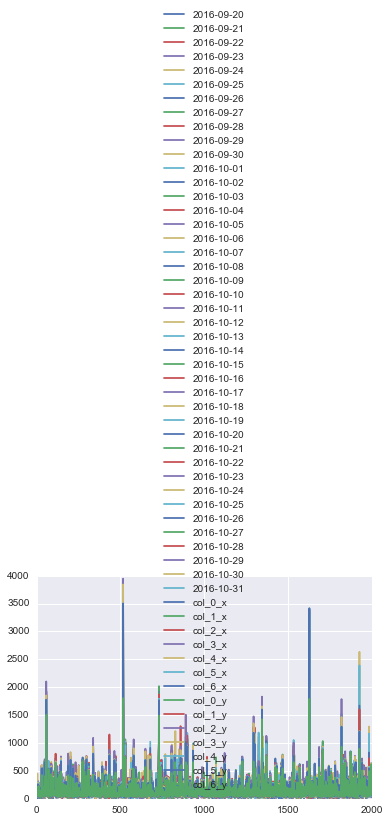

In [370]:
six_week_23.plot()